In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Dados escolares

In [12]:
#abrindo os dados
dados_escolares = pd.read_csv('DadosEscolares1996-2015.csv', encoding = 'latin1')
nota = pd.read_csv('ENEM2015.csv')
#agrupando por escolas
dados_escolares = dados_escolares.groupby('CODMEC').mean()
#Apagando a classe desbalanceada
nota = nota[nota.Classificacao != 0]
#Em todos Dataframes temos mais escolas do que o nosso target
dados_escolares = dados_escolares.reset_index()[dados_escolares.reset_index().CODMEC.isin(nota['CODIGO DA ENTIDADE'])]
dados_escolares.drop(dados_escolares.columns[dados_escolares.isnull().mean() != 0], axis=1, inplace = True)
#Alterando o nome da coluna para o merge
nota.rename(columns = {'CODIGO DA ENTIDADE':'CODMEC'}, inplace = True)
#criando o merge com base na coluna CODMEC usando o dataframe target e os dados escolares
new_df = pd.merge(dados_escolares, nota, on = 'CODMEC')
#new_df.drop(['CODMEC', 'ANO','NUMERO DE PARTICIPANTES'], axis = 1, inplace = True)
#criando o data e o target
data = new_df.drop('Classificacao', axis = 1)
target = new_df.Classificacao

C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,8,11,17,18,19,20,111,240) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
new_df.columns

Index(['CODMEC', 'ANO', 'SITUAÃâ¡ÃÆO', 'Qtde_Docentes', 'NUM_FUNC',
       'SETEDU', 'AL_CRECHE', 'AL_PRE', '0', '1',
       ...
       'EE_Creche', 'EE_Pre', 'EE_Fund', 'EE_Med', 'EE_EJA', 'EE_EP',
       'ALEDESP', 'TOTAL_ALUNOS', 'NUMERO DE PARTICIPANTES', 'Classificacao'],
      dtype='object', length=214)

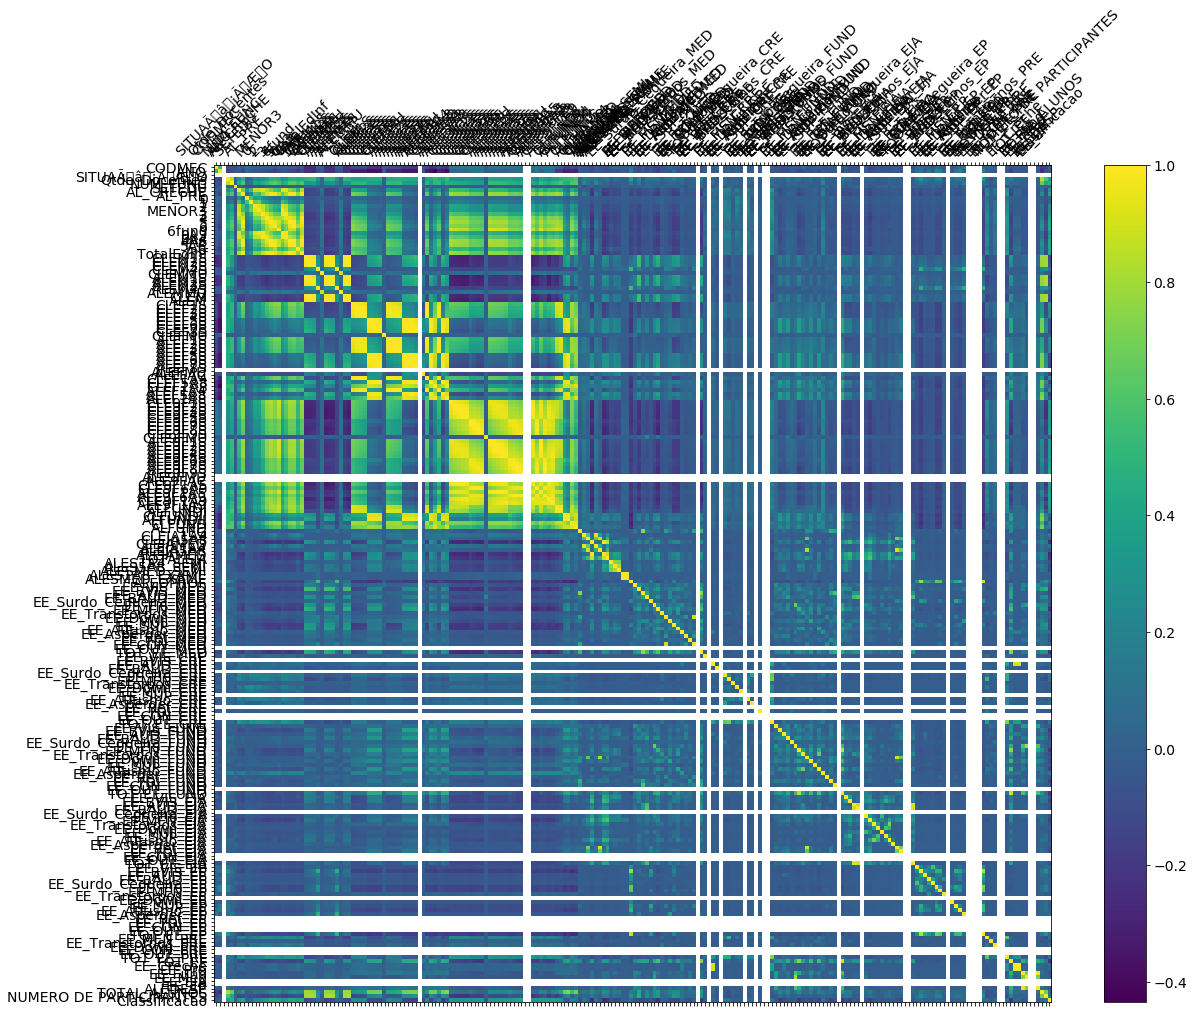

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(new_df.corr(), fignum=f.number)
plt.xticks(range(new_df.shape[1]), new_df.columns, fontsize=14, rotation=45)
plt.yticks(range(new_df.shape[1]), new_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [19]:
new_df.corr().Classificacao.abs().sort_values(ascending = False)

Classificacao            1.000000
NUM_FUNC                 0.473632
6                        0.437872
5A6                      0.435968
4A6                      0.431191
5                        0.427446
TotalEdInf               0.425542
AL_PRE                   0.421882
ALE9F9S                  0.416164
6fund                    0.412957
ALE9F8S                  0.404257
>6                       0.397247
ALE9F6A9                 0.392393
ALE9F1A9                 0.388413
Qtde_Docentes            0.386018
4                        0.382403
CLE9F9S                  0.377310
ALE9F7S                  0.371341
CLE9F8S                  0.369739
ALE9F5S                  0.366389
CLE9F1A9                 0.364444
ALE9F1A5                 0.362710
ALE9F4S                  0.362203
CLE9F6A9                 0.358336
CLE9F1S                  0.356757
CLE9F1A5                 0.355210
ALE9F3S                  0.352092
0A4                      0.348990
CLFUNDI                  0.348686
ALE9F1S       

In [6]:
dados_escolares.shape

(692, 212)

In [3]:
melhor_score = 0
melhores_colunas = []
while len(data.columns) >= 10:
    lm = LinearRegression()
    scaler = StandardScaler()
    data1 = scaler.fit_transform(data)
    coefs = [0 for x in range(len(data.columns))]
    kf = KFold(5, shuffle = True)
    r = []
    for train_i, test_i in kf.split(data):
        x_train, x_test = data1[train_i], data1[test_i]
        y_train, y_test = target[train_i], target[test_i]
        lm.fit(x_train, y_train)
        r.append(lm.score(x_test, y_test))
        for x in range(len(coefs)):
            coefs[x] = coefs[x] + abs(lm.coef_[x])
    print('Score:',sum(r)/5)
    if melhor_score< sum(r)/5:
        melhor_score = sum(r)/5
        melhores_colunas = list(data.columns)
    ind = coefs.index(min(coefs))
    print('Smaller coef columns:', data.columns[ind], min(coefs)/5)
    data.drop(data.columns[ind], axis=1, inplace = True)

Score: -2.8441465882226397e+24
Smaller coef columns: EE_Down_EP 0.0
Score: -7.9727078760849155
Smaller coef columns: EE_Ret_EP 0.0
Score: -0.8659721610203006
Smaller coef columns: EE_TDI_EP 0.0
Score: -3.604734931817707
Smaller coef columns: EE_CON_EP 0.0
Score: -0.9680051428856364
Smaller coef columns: EE_OUT_EP 0.0
Score: -140.6773079462822
Smaller coef columns: EE_CON_PRE 0.0
Score: -0.2771323415441558
Smaller coef columns: EE_OUT_PRE 0.0
Score: -2.436843409544437e+24
Smaller coef columns: EE_EJA 0.0
Score: -0.8230622523703964
Smaller coef columns: EE_EP 0.0
Score: -3.395610285325584
Smaller coef columns: EE_OUT_EJA 7.911449273478866e-14
Score: -2.046937311636401
Smaller coef columns: EE_OUT_FUND 6.276756892020785e-13
Score: -8.080117631724733e+23
Smaller coef columns: SITUAÃâ¡ÃÆO 5.243630433931993e-12
Score: -2.057122468295991e+19
Smaller coef columns: EE_VIS_CRE 0.004402810749218239
Score: -0.46544181429201814
Smaller coef columns: EE_CON_EJA 2.313704783318826e-13
Score: -5.22

Score: 0.056892560643741284
Smaller coef columns: EE_Asperger_MED 0.03900833728342358
Score: 0.006888532755031917
Smaller coef columns: EE_Surdo_Cegueira_MED 0.031745760033490465
Score: -3.1702216609847422
Smaller coef columns: EE_MEN_FUND 0.0313524263225833
Score: 0.1973507434833592
Smaller coef columns: EE_Asperger_FUND 0.035744148923196384
Score: 0.098138980666718
Smaller coef columns: EE_AUD_CRE 0.03233032849822101
Score: 0.2208708620498836
Smaller coef columns: ALES1A4_SEMI 0.037890169724875675
Score: 0.14475295567823926
Smaller coef columns: ALESMED_SEMI 0.017420919448694266
Score: 0.29053987382964985
Smaller coef columns: EE_SUP_FUND 0.04946807987431758
Score: 0.23406821395417743
Smaller coef columns: EE_BAUD_EJA 0.04902373352095915
Score: 0.21231034486981865
Smaller coef columns: TOT_EE_MED 0.038329460264891924
Score: 0.3288738418865654
Smaller coef columns: ALEM4S 0.02882477095074496
Score: 0.17976218391537396
Smaller coef columns: TOT_EE_EJA 0.04781726960272002
Score: -0.1094

In [4]:
print('O melhor score foi: ', melhor_score)
print('Com as seguintes colunas: \n', melhores_colunas)

O melhor score foi:  0.4618858320073452
Com as seguintes colunas: 
 ['Qtde_Docentes', 'MENOR3', '3', '0A3', '0A4', '4A6', '5A6', 'TotalEdInf', 'CLEM2S', 'ALEM1S', 'ALEM2S', 'CLEM', 'CLEF1S', 'CLEF5S', 'CLEF6S', 'ALEF1S', 'ALEF4S', 'ALEF5S', 'ALEF7S', 'ALEF8S', 'CLEF1A4', 'CLEF5A8', 'CLEF1A8', 'ALEF1A4', 'ALEF5A8', 'ALEF1A8', 'CLE9F3S', 'CLE9F8S', 'ALE9F3S', 'ALE9F8S', 'CLE9F1A5', 'CLE9F6A9', 'ALE9F6A9', 'CLE9F1A9', 'ALE9F1A9', 'CLFUNDI', 'ALFUNDI', 'CLFUNDII', 'ALFUNDII', 'CLFUND', 'ALFUND', 'TOTAL_ALUNOS']


## ESC_RMSP

In [38]:
#abrindo os dados
esc_rmsp = pd.read_csv('ESC2013_RMSP_CEM.csv', encoding = 'latin1')
print(esc_rmsp.shape)
#agrupando por escolas
#Apagando a classe desbalanceada
#Em todos Dataframes temos mais escolas do que o nosso target
esc_rmsp = esc_rmsp[esc_rmsp.CODESC.isin(nota['CODMEC'])]
esc_rmsp.rename(columns = {'CODESC': 'CODMEC'}, inplace = True)
#Dataframe com bastante valores NaN, limpando eles
esc_rmsp.drop(esc_rmsp.columns[esc_rmsp.isnull().mean() >= 0.15], axis=1, inplace = True)
esc_rmsp.dropna(inplace = True, how = 'any')
#criando o merge com base na coluna CODMEC usando o dataframe target e os dados escolares
new_df = pd.merge(esc_rmsp, nota, on = 'CODMEC')
#new_df.drop(['CODMEC','NUMERO DE PARTICIPANTES'], axis = 1, inplace = True)
print(new_df.shape)
#criando o data e o target
data = new_df.drop('Classificacao', axis = 1)
print(data.shape)
target = new_df.Classificacao
data = data.astype('float64')

(10937, 136)
(930, 64)
(930, 63)


ValueError: could not convert string to float: 'BAIRRO DAS PALMEIRAS'

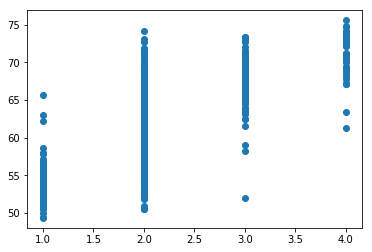

In [39]:
plt.scatter(new_df.Classificacao, new_df.INSE_AB)
plt.show()

In [33]:
nota.count_values()

AttributeError: 'DataFrame' object has no attribute 'count_values'

In [21]:
new_df.corr().Classificacao.abs().sort_values(ascending = False)

Classificacao              1.000000
INSE_AB                    0.724209
COD_DEP                    0.524905
REG_FU_8A                  0.424429
REG_IN_PE                  0.393742
BIBLIO                     0.391530
AB1EM_13                   0.381634
AP3EM_13                   0.371108
AP9EF_12                   0.370627
APR3EM_11                  0.370626
AP3EM_12                   0.370313
AP3EM_14                   0.361961
AP9EF_13                   0.351180
AB1EM_14                   0.347155
AB1EM_12                   0.346391
AB1EM_11                   0.342790
REG_IN_CR                  0.342772
AP9EF_14                   0.316212
AB1EM_09                   0.285506
AB1EM_10                   0.277812
EJA                        0.241735
EJA_MED                    0.229832
CEP                        0.167033
REG_FU_9A                  0.130426
CODDIST                    0.129700
CODMUN                     0.129698
QD_ESP_D                   0.109708
CODESCTX                   0

In [6]:
melhor_score = 0
melhores_colunas = []
while len(data.columns) >= 10:
    lm = LinearRegression()
    scaler = StandardScaler()
    data1 = scaler.fit_transform(data)
    coefs = [0 for x in range(len(data.columns))]
    kf = KFold(5, shuffle = True)
    r = []
    for train_i, test_i in kf.split(data):
        x_train, x_test = data1[train_i], data1[test_i]
        y_train, y_test = target[train_i], target[test_i]
        lm.fit(x_train, y_train)
        r.append(lm.score(x_test, y_test))
        for x in range(len(coefs)):
            coefs[x] = coefs[x] + abs(lm.coef_[x])
    print('Score:',sum(r)/5)
    if melhor_score< sum(r)/5:
        melhor_score = sum(r)/5
        melhores_colunas = list(data.columns)
    ind = coefs.index(min(coefs))
    print('Smaller coef columns:', data.columns[ind], min(coefs)/5)
    data.drop(data.columns[ind], axis=1, inplace = True)

Score: -3.612175653631054e+26
Smaller coef columns: ESP_FU_8A 0.001501665549550424
Score: -5.182213214721005e+21
Smaller coef columns: ESP_IN_PE 0.0036812371236436547
Score: 0.5031429233568414
Smaller coef columns: AB1EM_12 0.003252259658009837
Score: 0.4956359038272127
Smaller coef columns: CODESCTX 0.003231409049161442
Score: 0.4917959120444664
Smaller coef columns: ESP_MED_P 4.655962726474172e-10
Score: 0.51497339258797
Smaller coef columns: REG_MED 0.005657163730566267
Score: 0.49555960628615453
Smaller coef columns: REG_MED_P 0.005900884615424621
Score: 0.5051859908269012
Smaller coef columns: REG_MED_I 0.007372753429598655
Score: 0.5042571629419252
Smaller coef columns: ESP_MED_N 4.778894613366446e-10
Score: 0.5055479800007101
Smaller coef columns: EJA_PROJ 3.0732536515643003e-10
Score: 0.5027164710975462
Smaller coef columns: ESP_MED_I 8.349559266207507e-10
Score: 0.47981852049246
Smaller coef columns: ESP_MED 9.184521587712879e-10
Score: -5.110799961195229e+23
Smaller coef colu

In [7]:
print('O melhor score foi: ', melhor_score)
print('Com as seguintes colunas: \n', melhores_colunas)

O melhor score foi:  0.5270840244725372
Com as seguintes colunas: 
 ['CODMUN', 'CODDIST', 'BIBLIO', 'REG_IN_CR', 'REG_FU_9A', 'ESP_FU_9A', 'EJA', 'EJA_FUND', 'EJA_MED', 'AB1EM_10', 'AP9EF_12', 'AP9EF_13', 'AP9EF_14', 'AP3EM_14', 'AB1EM_14', 'INSE_AB']


## Rendimento

In [22]:
#abrindo os dados
rendimento = pd.read_csv('RendimentoEscolar2000-2015.csv', encoding = 'latin1')
#agrupando por escolas
rendimento = rendimento.groupby('CODMEC').mean()
#Em todos Dataframes temos mais escolas do que o nosso target
rendimento = rendimento.reset_index()[rendimento.reset_index().CODMEC.isin(nota['CODMEC'])]
def t(x):
    if x==0:
        return None
    else:
        return x
for c in rendimento.columns:
    rendimento[c] = rendimento[c].apply(t)
rendimento.drop(rendimento.columns[rendimento.isnull().mean() >= 0.15], axis=1, inplace = True)
rendimento.dropna(inplace = True, how = 'any')
#criando o merge com base na coluna CODMEC usando o dataframe target e os dados escolares
new_df = pd.merge(rendimento, nota, on = 'CODMEC')
#new_df.drop(['CODMEC','NUMERO DE PARTICIPANTES'], axis = 1, inplace = True)
#criando o data e o target
data = new_df.drop('Classificacao', axis = 1)
target = new_df.Classificacao

C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
new_df.corr().Classificacao.abs().sort_values(ascending = False)

Classificacao              1.000000
EFAPROV9ANOS4S             0.518244
EFAPROV9ANOS5S             0.511725
EFAPROV9ANOS1S             0.502764
EFAPROV9ANOS3S             0.502602
EFAPROV9ANOS7S             0.502211
EFAPROV9ANOS6S             0.497901
TOTALEF_APROV              0.485537
EFAPROV9ANOS2S             0.485485
NUMERO DE PARTICIPANTES    0.451645
EFAPROV9ANOS8S             0.450955
EFAPROV9ANOS9S             0.432875
EMAPROV3S                  0.395994
EMAPROV1S                  0.379735
TOTAL_EM_APROV             0.372989
EMAPROV2S                  0.328318
TOTAL_EM_REPROV            0.182645
ANO                        0.165231
CODMEC                     0.150205
TOTALEF_REPROV             0.081053
Name: Classificacao, dtype: float64

In [9]:
melhor_score = 0
melhores_colunas = []
while len(data.columns) >= 10:
    lm = LinearRegression()
    scaler = StandardScaler()
    data1 = scaler.fit_transform(data)
    coefs = [0 for x in range(len(data.columns))]
    kf = KFold(5, shuffle = True)
    r = []
    for train_i, test_i in kf.split(data):
        x_train, x_test = data1[train_i], data1[test_i]
        y_train, y_test = target[train_i], target[test_i]
        lm.fit(x_train, y_train)
        r.append(lm.score(x_test, y_test))
        for x in range(len(coefs)):
            coefs[x] = coefs[x] + abs(lm.coef_[x])
    print('Score:',sum(r)/5)
    if melhor_score< sum(r)/5:
        melhor_score = sum(r)/5
        melhores_colunas = list(data.columns)
    ind = coefs.index(min(coefs))
    print('Smaller coef columns:', data.columns[ind], min(coefs)/5)
    data.drop(data.columns[ind], axis=1, inplace = True)

Score: 0.23331939890278708
Smaller coef columns: TOTAL_EM_REPROV 0.05608419976153774
Score: 0.3214072658647969
Smaller coef columns: EFAPROV9ANOS6S 0.042022645736582
Score: -4.048150253794485
Smaller coef columns: EFAPROV9ANOS3S 0.06415125427266956
Score: 0.2931903817837792
Smaller coef columns: EFAPROV9ANOS1S 0.07638170869961866
Score: 0.2868996174922507
Smaller coef columns: EFAPROV9ANOS5S 0.08477679325469949
Score: 0.1944237876450023
Smaller coef columns: EFAPROV9ANOS7S 0.07323663822240649
Score: 0.22765605414660178
Smaller coef columns: TOTALEF_REPROV 0.0912021263023351
Score: 0.33274298431942406
Smaller coef columns: EFAPROV9ANOS4S 0.11224751519497986


In [10]:
print('O melhor score foi: ', melhor_score)
print('Com as seguintes colunas: \n', melhores_colunas)

O melhor score foi:  0.33274298431942406
Com as seguintes colunas: 
 ['ANO', 'EFAPROV9ANOS2S', 'EFAPROV9ANOS4S', 'EFAPROV9ANOS8S', 'EFAPROV9ANOS9S', 'TOTALEF_APROV', 'EMAPROV1S', 'EMAPROV2S', 'EMAPROV3S', 'TOTAL_EM_APROV']


## With a bigger dataframe

In [46]:
#abrindo os dados
dados_escolares = pd.read_csv('DadosEscolares1996-2015.csv', encoding = 'latin1')
esc_rmsp = pd.read_csv('ESC2013_RMSP_CEM.csv', encoding = 'latin1')
rendimento = pd.read_csv('RendimentoEscolar2000-2015.csv', encoding = 'latin1')
nota = pd.read_csv('ENEM2015.csv')
#agrupando por escolas
dados_escolares = dados_escolares.groupby('CODMEC').mean()
esc_rmsp = esc_rmsp.groupby('CODESC').mean()
rendimento = rendimento.groupby('CODMEC').mean()
#Apagando a classe desbalanceada
nota = nota[nota.Classificacao != 0]
#Em todos Dataframes temos mais escolas do que o nosso target
nota.rename(columns = {'CODIGO DA ENTIDADE':'CODMEC'}, inplace = True)
dados_escolares = dados_escolares.reset_index()[dados_escolares.reset_index().CODMEC.isin(nota['CODMEC'])]
dados_escolares.drop(dados_escolares.columns[dados_escolares.isnull().mean() != 0], axis=1, inplace = True)
esc_rmsp = esc_rmsp.reset_index()[esc_rmsp.reset_index().CODESC.isin(nota['CODMEC'])]
esc_rmsp.rename(columns = {'CODESC': 'CODMEC'}, inplace = True)
rendimento = rendimento.reset_index()[rendimento.reset_index().CODMEC.isin(nota['CODMEC'])]
def t(x):
    if x==0:
        return None
    else:
        return x
for c in rendimento.columns:
    rendimento[c] = rendimento[c].apply(t)
rendimento.drop(rendimento.columns[rendimento.isnull().mean() >= 0.15], axis=1, inplace = True)
rendimento.dropna(inplace = True, how = 'any')
#criando o merge com base na coluna CODMEC usando o dataframe target e os dados escolares, rendimento, esc_rmsp
new_df = pd.merge(dados_escolares, nota, on = 'CODMEC')
#new_df = pd.merge(new_df, rendimento, on = 'CODMEC')
new_df = pd.merge(new_df, esc_rmsp, on = 'CODMEC')
new_df.drop(['CODMEC','NUMERO DE PARTICIPANTES'], axis = 1, inplace = True)
#criando o data e o target
data = new_df.drop('Classificacao', axis = 1)
target = new_df.Classificacao
data = data.astype('float64')
data.drop(data.columns[data.isnull().mean() != 0], axis=1, inplace = True)
data.dropna(inplace = True, how = 'any')

C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,8,11,17,18,19,20,111,240) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
melhor_score = 0
melhores_colunas = []
while len(data.columns) >= 10:
    lm = LinearRegression()
    scaler = StandardScaler()
    data1 = scaler.fit_transform(data)
    coefs = [0 for x in range(len(data.columns))]
    kf = KFold(5, shuffle = True)
    r = []
    for train_i, test_i in kf.split(data):
        x_train, x_test = data1[train_i], data1[test_i]
        y_train, y_test = target[train_i], target[test_i]
        lm.fit(x_train, y_train)
        r.append(lm.score(x_test, y_test))
        for x in range(len(coefs)):
            coefs[x] = coefs[x] + abs(lm.coef_[x])
    print('Score:',sum(r)/5)
    if melhor_score< sum(r)/5:
        melhor_score = sum(r)/5
        melhores_colunas = list(data.columns)
    ind = coefs.index(min(coefs))
    print('Smaller coef columns:', data.columns[ind], min(coefs)/5)
    data.drop(data.columns[ind], axis=1, inplace = True)

Score: -3.412524878429185e+23
Smaller coef columns: EE_EP 0.0
Score: -1.4803561536831569e+23
Smaller coef columns: CODMUN 0.0
Score: -8.021422942507461e+21
Smaller coef columns: LOCALIZA 0.0
Score: -3.9308251978760047e+24
Smaller coef columns: EE_EJA 0.0
Score: -5.706802942959696e+21
Smaller coef columns: ENS_REG 0.0
Score: -7.226118275743709e+22
Smaller coef columns: ESP_MED 0.0
Score: -6.596597703500591e+23
Smaller coef columns: ESP_MED_I 0.0
Score: -5.92495252330961e+23
Smaller coef columns: ESP_MED_N 0.0
Score: -4.0845245606573056e+23
Smaller coef columns: ESP_MED_P 0.0
Score: -9.851338309724473e+22
Smaller coef columns: ESP_EJA_F 0.0
Score: -1.210040278313621e+23
Smaller coef columns: ESP_EJA_M 0.0
Score: -2.0013210711739935e+23
Smaller coef columns: EJA_PROJ 0.0
Score: -2.3617996240238568e+23
Smaller coef columns: EE_VIS_FUND 0.004632592595016369
Score: -2.2380947391739013e+23
Smaller coef columns: EE_Transtornos_PRE 0.009166222234763011
Score: -1.7366299236688168e+23
Smaller coe

Score: -0.8715334806806035
Smaller coef columns: EE_BVIS_EJA 0.016325258988898535
Score: -1.095438967026578
Smaller coef columns: EE_BAUD_EP 0.022725733129055098
Score: -0.2241088136135682
Smaller coef columns: QD_ESP_D 0.02166591678914062
Score: 0.11341879264109508
Smaller coef columns: ESP_FU_9A 0.022403648958290705
Score: 0.18626776654027763
Smaller coef columns: EE_MUL_EP 0.02541294262164665
Score: -0.8474935822208665
Smaller coef columns: EE_BVIS_EP 0.017634290371351856
Score: -0.26005835949791384
Smaller coef columns: EE_MEN_EP 0.02007602126602343
Score: 0.07765737630171396
Smaller coef columns: EE_Autismo_EP 0.021260460549556708
Score: -0.5316761653157629
Smaller coef columns: EE_SUP_EP 0.029155162392088846
Score: -1.6297629299416108
Smaller coef columns: EE_VIS_EJA 0.025390379690058952
Score: -0.36617247825650284
Smaller coef columns: ALESMED_SEMI 0.026581088713045486
Score: -0.5674523304283403
Smaller coef columns: ALES1A4_SEMI 0.017413814626968525
Score: -0.4476278598243583
S

Score: 0.24039552279865334
Smaller coef columns: CLEF5S 0.3439233101005802
Score: -0.06513977344749056
Smaller coef columns: ALE9F8S 0.4557989839768305
Score: 0.3139258190912489
Smaller coef columns: CLE9F8S 0.21922044550880476
Score: 0.279625244369649
Smaller coef columns: ALEF6S 0.41426718176116556
Score: 0.2579395426438233
Smaller coef columns: AL_PRE 0.48371334288752654
Score: 0.31100262406357526
Smaller coef columns: CLE9F3S 0.5639808900513376
Score: -0.14727533856833414
Smaller coef columns: ALE9F3S 0.18682263523403803
Score: 0.30376677730255885
Smaller coef columns: ALEF8S 0.6127418662125284
Score: 0.29016970174814655
Smaller coef columns: ALEF5S 0.6521454300725639
Score: 0.28129579126666854
Smaller coef columns: CLEF6S 0.42688894554521406
Score: 0.2778901217200719
Smaller coef columns: CLFUNDII 0.527175189877555
Score: 0.3000676870340741
Smaller coef columns: ALEM 0.8772058309199432
Score: -0.3189822246094614
Smaller coef columns: ALEM1S 0.0193301764088072
Score: 0.254340646039

In [49]:
print('O melhor score foi: ', melhor_score)
print('Com as seguintes colunas: \n', melhores_colunas)

O melhor score foi:  0.43458212954541187
Com as seguintes colunas: 
 ['Qtde_Docentes', 'AL_PRE', 'MENOR3', '3', '4', '5', '6', '0A3', '0A4', '4A6', '5A6', 'TotalEdInf', 'CLEM1S', 'CLEM2S', 'CLEM3S', 'CLEM4S', 'ALEM1S', 'ALEM2S', 'CLEM', 'ALEM', 'CLEF3S', 'CLEF5S', 'CLEF6S', 'ALEF3S', 'ALEF5S', 'ALEF6S', 'ALEF7S', 'ALEF8S', 'CLEF1A4', 'CLEF5A8', 'CLEF1A8', 'ALEF1A4', 'ALEF5A8', 'ALEF1A8', 'CLE9F3S', 'CLE9F5S', 'CLE9F8S', 'ALE9F3S', 'ALE9F4S', 'ALE9F5S', 'ALE9F6S', 'ALE9F7S', 'ALE9F8S', 'CLE9F1A5', 'CLE9F6A9', 'ALE9F6A9', 'CLE9F1A9', 'ALE9F1A9', 'CLFUNDI', 'ALFUNDI', 'CLFUNDII', 'ALFUNDII', 'CLFUND', 'ALFUND', 'ALEDPROF', 'EJA', 'EJA_MED']


In [5]:
#abrindo os dados
dados_escolares = pd.read_csv('DadosEscolares1996-2015.csv', encoding = 'latin1')
esc_rmsp = pd.read_csv('ESC2013_RMSP_CEM.csv', encoding = 'latin1')
rendimento = pd.read_csv('RendimentoEscolar2000-2015.csv', encoding = 'latin1')
nota = pd.read_csv('ENEM2015.csv')
#agrupando por escolas
dados_escolares = dados_escolares.groupby('CODMEC').mean()
esc_rmsp = esc_rmsp.groupby('CODESC').mean()
rendimento = rendimento.groupby('CODMEC').mean()
#Apagando a classe desbalanceada
nota = nota[nota.Classificacao != 0]
#Em todos Dataframes temos mais escolas do que o nosso target
nota.rename(columns = {'CODIGO DA ENTIDADE':'CODMEC'}, inplace = True)
dados_escolares = dados_escolares.reset_index()[dados_escolares.reset_index().CODMEC.isin(nota['CODMEC'])]
dados_escolares.drop(dados_escolares.columns[dados_escolares.isnull().mean() != 0], axis=1, inplace = True)
esc_rmsp = esc_rmsp.reset_index()[esc_rmsp.reset_index().CODESC.isin(nota['CODMEC'])]
esc_rmsp.rename(columns = {'CODESC': 'CODMEC'}, inplace = True)
rendimento = rendimento.reset_index()[rendimento.reset_index().CODMEC.isin(nota['CODMEC'])]
def t(x):
    if x==0:
        return None
    else:
        return x
for c in rendimento.columns:
    rendimento[c] = rendimento[c].apply(t)
rendimento.drop(rendimento.columns[rendimento.isnull().mean() >= 0.15], axis=1, inplace = True)
rendimento.dropna(inplace = True, how = 'any')
#criando o merge com base na coluna CODMEC usando o dataframe target e os dados escolares, rendimento, esc_rmsp
new_df = pd.merge(dados_escolares, nota, on = 'CODMEC')
new_df = pd.merge(new_df, rendimento, on = 'CODMEC')
new_df = pd.merge(new_df, esc_rmsp, on = 'CODMEC')
print(new_df.shape)
new_df.drop(['CODMEC','NUMERO DE PARTICIPANTES'], axis = 1, inplace = True)
#criando o data e o target
data = new_df.drop('Classificacao', axis = 1)
target = new_df.Classificacao
data = data.astype('float64')
data.drop(data.columns[data.isnull().mean() != 0], axis=1, inplace = True)
data.dropna(inplace = True, how = 'any')

C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,8,11,17,18,19,20,111,240) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(365, 356)


In [51]:
melhor_score = 0
melhores_colunas = []
while len(data.columns) >= 10:
    lm = LinearRegression()
    scaler = StandardScaler()
    data1 = scaler.fit_transform(data)
    coefs = [0 for x in range(len(data.columns))]
    kf = KFold(5, shuffle = True)
    r = []
    for train_i, test_i in kf.split(data):
        x_train, x_test = data1[train_i], data1[test_i]
        y_train, y_test = target[train_i], target[test_i]
        lm.fit(x_train, y_train)
        r.append(lm.score(x_test, y_test))
        for x in range(len(coefs)):
            coefs[x] = coefs[x] + abs(lm.coef_[x])
    print('Score:',sum(r)/5)
    if melhor_score< sum(r)/5:
        melhor_score = sum(r)/5
        melhores_colunas = list(data.columns)
    ind = coefs.index(min(coefs))
    print('Smaller coef columns:', data.columns[ind], min(coefs)/5)
    data.drop(data.columns[ind], axis=1, inplace = True)

Score: -2.3823914852807653e+23
Smaller coef columns: EE_Surdo_Cegueira_EP 0.0
Score: -4.529443788602922e+23
Smaller coef columns: EE_VIS_EP 0.0
Score: -4.1211706653106117e+26
Smaller coef columns: EE_Down_EP 0.0
Score: -1.5578318135289372e+25
Smaller coef columns: EE_MUL_EP 0.0
Score: -1.9163152435163238e+25
Smaller coef columns: EE_Asperger_EP 0.0
Score: -4.4949522703025726e+26
Smaller coef columns: EE_Ret_EP 0.0
Score: -2.023370824481433e+25
Smaller coef columns: EE_TDI_EP 0.0
Score: -1.6163083757699286e+25
Smaller coef columns: EE_CON_EP 0.0
Score: -3.546106660691335e+24
Smaller coef columns: EE_OUT_EP 0.0
Score: -7.020913541565197e+24
Smaller coef columns: EE_CON_PRE 0.0
Score: -3.0617954839639155e+25
Smaller coef columns: EE_OUT_PRE 0.0
Score: -3.139163889545507e+25
Smaller coef columns: EE_Med 0.0
Score: -2.8351560411273836e+25
Smaller coef columns: EE_OUT_EJA 0.0
Score: -3.651700456592256e+24
Smaller coef columns: EE_EJA 0.0
Score: -1.8238397234957735e+25
Smaller coef columns: E

Smaller coef columns: EFAPROV9ANOS4S 0.09763144157266772
Score: -97.7922579558207
Smaller coef columns: ALEMMU 0.09250889461781407
Score: -458.8505711638205
Smaller coef columns: CLEMMU 0.0499591398829984
Score: -34.13567860624447
Smaller coef columns: EFAPROV9ANOS6S 0.10332871545079798
Score: -7.130611768456909
Smaller coef columns: EE_Autismo_EP 0.08251122216944899
Score: -15.156399032133162
Smaller coef columns: EE_Transtornos_EP 0.02720837498507509
Score: -7.100742178822488
Smaller coef columns: EE_AUD_EP 0.043187879217498046
Score: -226.3573595163436
Smaller coef columns: EE_MEN_EP 0.02855949687264191
Score: -38.62372321710525
Smaller coef columns: EE_BAUD_EP 0.04363322266462055
Score: -498.541069199308
Smaller coef columns: EE_FIS_EP 0.02960216837617341
Score: -138.39803529370133
Smaller coef columns: TOT_EE_EP 0.024465774636294447
Score: -51.77308309417973
Smaller coef columns: EE_BVIS_EP 0.07040253428519726
Score: -51.3480410816846
Smaller coef columns: EE_Pre 0.038167945518458

Score: 0.2714097275784961
Smaller coef columns: ALEF1S 0.4967291728949217
Score: 0.2663738063818824
Smaller coef columns: ALEF5S 0.7710491484298974
Score: 0.2588321599640566
Smaller coef columns: ALFUNDII 0.618830411007218
Score: 0.21423686184690238
Smaller coef columns: ALE9F6A9 0.612121743054139
Score: 0.16560037321037382
Smaller coef columns: CLE9F6A9 0.9382841566500186
Score: 0.2169268597586851
Smaller coef columns: ALEF8S 1.2251629687243943
Score: 0.1900230666059206
Smaller coef columns: ALEF5A8 0.18866736632550657
Score: 0.15080530239514212
Smaller coef columns: TotalEdInf 1.3288462728884043
Score: 0.24784384308725999
Smaller coef columns: 0A3 0.9089989960060562
Score: 0.21455112211909938
Smaller coef columns: 0A4 0.08177916452583534


In [52]:
print('O melhor score foi: ', melhor_score)
print('Com as seguintes colunas: \n', melhores_colunas)

O melhor score foi:  0.49812458775754365
Com as seguintes colunas: 
 ['Qtde_Docentes', 'MENOR3', '3', '4', '0A3', '0A4', '4A6', '5A6', 'TotalEdInf', 'ALEF1S', 'ALEF2S', 'ALEF4S', 'ALEF5S', 'ALEF7S', 'ALEF8S', 'CLEF1A4', 'CLEF5A8', 'CLEF1A8', 'ALEF1A4', 'ALEF5A8', 'ALE9F1S', 'ALE9F4S', 'CLE9F1A5', 'CLE9F6A9', 'ALE9F1A5', 'ALE9F6A9', 'CLE9F1A9', 'CLFUNDI', 'CLFUNDII', 'ALFUNDII', 'CLFUND', 'ALFUND']
